
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The best director
What kinds of properties are associated with movies that have high revenues?
The correlation between vote_count and revenue
Best Director
The correlation between Budget and revenue



### General Properties

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.shape

(10866, 21)

### Data Cleaning 

In [30]:
df.drop(['id', 'imdb_id', 'cast', 'homepage','tagline','keywords','overview','runtime','budget_adj','revenue_adj','production_companies','release_date','original_title'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,James Wan,Action|Crime|Thriller,2947,7.3,2015


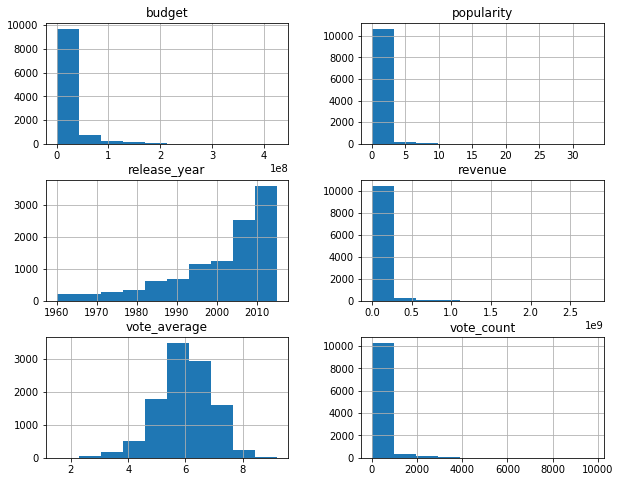

In [10]:
df.hist(figsize=(10,8));

In [11]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000


In [12]:
df.isna().sum()

popularity       0
budget           0
revenue          0
director        44
genres          23
vote_count       0
vote_average     0
release_year     0
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.drop_duplicates(inplace=True)

In [15]:
df

,popularity,budget,revenue,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,James Wan,Action|Crime|Thriller,2947,7.3,2015
5,9.110700,135000000,532950503,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,3929,7.2,2015
6,8.654359,155000000,440603537,Alan Taylor,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015
7,7.667400,108000000,595380321,Ridley Scott,Drama|Adventure|Science Fiction,4572,7.6,2015
8,7.404165,74000000,1156730962,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,2893,6.5,2015
9,6.326804,175000000,853708609,Pete Docter,Comedy|Animation|Family,3935,8.0,2015


## Exploratory Data Analysis

<h2>The best Director</h2>

In [16]:
Test=df.groupby('director')[['vote_average','vote_count']].mean()
Test.max()
Test.loc[Test['vote_average']==9.2]


,vote_average,vote_count
director,,
Mark Cousins,9.2,14.0


# Director of movies that have high revenues?


In [17]:
df.revenue.describe()

count    1.080000e+04
mean     4.006558e+07
std      1.173193e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.455409e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [18]:
df.query('revenue >2.400000e+07')['director'].value_counts()

Steven Spielberg                                                                                                                                                             26
Clint Eastwood                                                                                                                                                               24
Ridley Scott                                                                                                                                                                 18
Ron Howard                                                                                                                                                                   17
Tim Burton                                                                                                                                                                   15
Robert Zemeckis                                                                                                         

Steven Spielberg is the highest earning movie director of all time

 

# let's find out the genres of the most pofit films

In [52]:
highest_films_revenue=highest_films_rate=df.query('revenue >2.400000e+07')

In [53]:
Genres_of_high_revenue_movies = highest_films_revenue['genres'].str.cat(sep = '|')


In [54]:
Genres_of_high_revenue_movies=pd.Series(Genres_of_high_revenue_movies.split('|'))

In [63]:
Genres_of_high_revenue_movies.value_counts()

Drama              1116
Comedy             1042
Action              831
Thriller            820
Adventure           631
Romance             457
Crime               452
Family              381
Science Fiction     367
Fantasy             328
Horror              272
Mystery             224
Animation           176
History              94
Music                92
War                  83
Western              31
Documentary          13
Foreign               2
TV Movie              1
dtype: int64

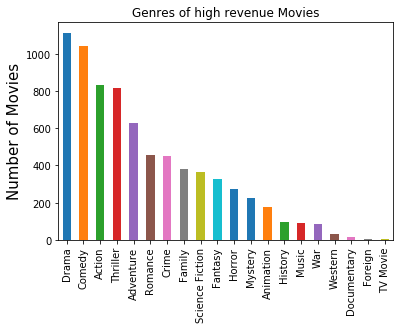

In [97]:
Genres_of_high_revenue_movies.value_counts().plot(kind='bar');
plt.ylabel('Number of Movies',fontsize=15)
plt.title('Genres of high revenue Movies')
plt.show()



The drama type is the most common one at high revenue movies

# The correlation between vote_count and revenue


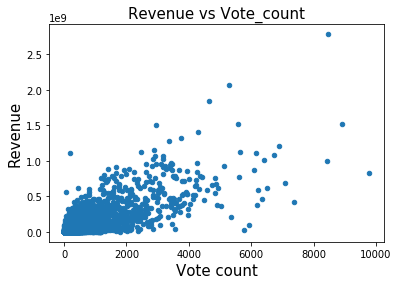

In [90]:
df.plot(x='vote_count',y='revenue',kind='scatter');
plt.ylabel('Revenue',fontsize=15)
plt.xlabel('Vote count',fontsize=15)
plt.title('Revenue vs Vote_count',fontsize=15)
plt.show()

In [47]:
df.vote_count.corr(df.revenue)

0.7910278339943615

We have a positive corrlation between vote_count & revenue

# The correlation between Budget and revenue


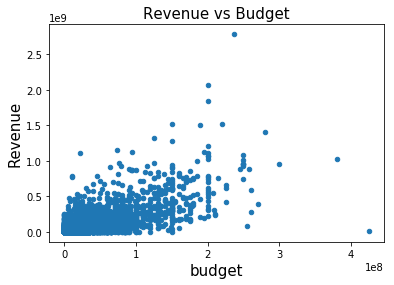

In [88]:
df.plot(x='budget',y='revenue',kind='scatter');
plt.ylabel('Revenue',fontsize=15)
plt.xlabel('budget',fontsize=15)
plt.title('Revenue vs Budget',fontsize=15)
plt.show()

In [49]:
df.budget.corr(df.revenue)

0.7347125084096328

We have a positive corrlation between budget & revenue

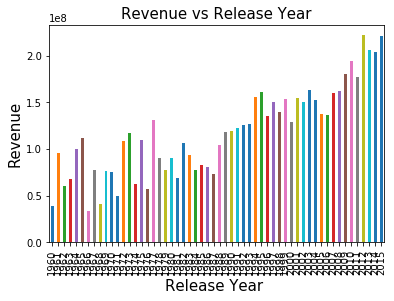

In [77]:
highest_films_revenue.groupby('release_year')['revenue'].mean().plot(kind='bar',y='Revenue')
plt.xlabel('Release Year ',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('Revenue vs Release Year', fontsize=15)
plt.show()

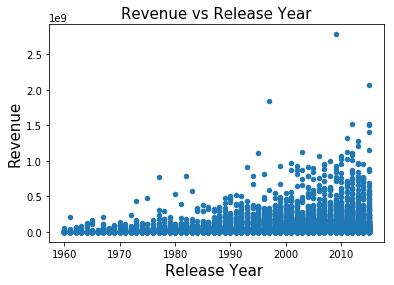

In [85]:
df.plot(x='release_year',y='revenue',kind='scatter');
plt.ylabel('Revenue',fontsize=15)
plt.xlabel('Release Year ',fontsize=15)
plt.title('Revenue vs Release Year',fontsize=15)
plt.show()

In [52]:
df.release_year.corr(df.revenue)

0.05809008272419698

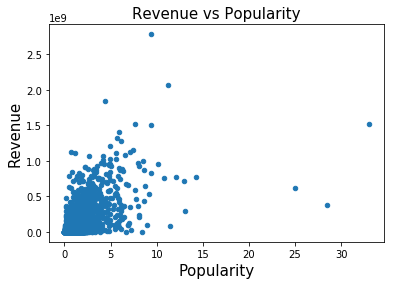

In [86]:
df.plot(x='popularity',y='revenue',kind='scatter');
plt.ylabel('Revenue',fontsize=15)
plt.xlabel('Popularity',fontsize=15)
plt.title('Revenue vs Popularity',fontsize=15)
plt.show()


# Which genres are most popular from year to year?


In [23]:
df.groupby('release_year')['genres'].describe()

,count,unique,top,freq
release_year,,,,
1960,32,25,Horror,3
1961,31,26,Drama,3
1962,32,26,Drama,4
1963,34,30,Horror,3
1964,42,38,Comedy|Romance,5
1965,35,33,Drama,2
1966,46,41,Action|Western,3
1967,40,30,Comedy|Drama|Romance,4
1968,39,31,Drama,4


<a id='conclusions'></a>
## Conclusions

The best director is Mark Cousins
The director who made movies with high revenue is Steven Spielberg 
The data show positive correlation between film Budget and the Revenue
The data show positive correlation between film Popularity and the Revenue
The data show positive correlation between vote_count and the Revenue

<strong>Limitations </strong>
About 50% of data have zero values in Budget and Revenue columns which make it harder to draw a percise conclution about the movies list
